In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv(r'C:\Users\11018\Downloads\pokemon.csv')
df = df.drop(['#'], axis =1)

In [15]:
df = df.fillna('0')#Filling all zero values with zero 

In [16]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,0,39,52,43,60,50,65,1,False


In [108]:
#Basic Visualizations using matplotlib and seaborn 
import matplotlib as pyplot 
import seaborn as sns

In [109]:
#Bar chart representations

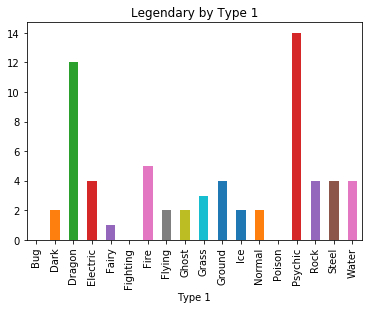

In [112]:
df.groupby('Type 1').sum()['Legendary'].plot.bar(title = 'Legendary by Type 1')

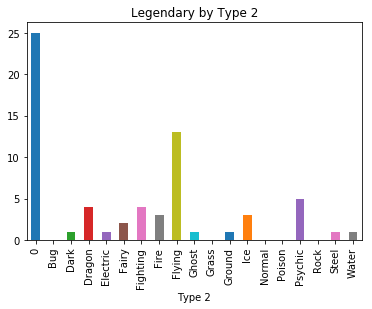

In [24]:
df.groupby('Type 2').sum()['Legendary'].plot.bar(title = 'Legendary by Type 2')

In [20]:
#Taking a example where the health is greater than 100 points 
HP = df.loc[df['HP']> 100]
HP.reset_index(drop = True, inplace = True)

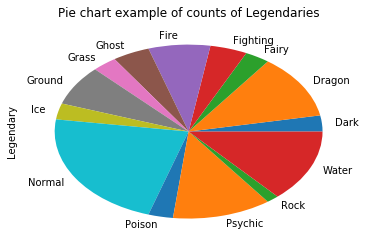

In [106]:
#Pie chart representation 
HP.groupby('Type 1').count()['Legendary'].plot.pie(title = 'Pie chart example of counts of Legendaries')

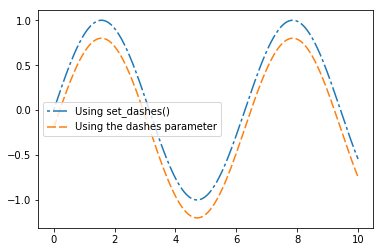

In [170]:
#Dashed lines example
x = np.linspace(0, 10, 500)#Creating a line with a sine wave
y = np.sin(x)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend()
plt.show()

Text(0,0.5,'Degree of characteristic')

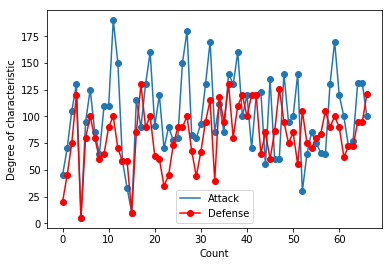

In [116]:
#Example for multiple plots in a single data frame 
ax = HP['Attack'].plot(legend = True,marker='o')
HP['Defense'].plot(legend = True,marker='o', color = 'red')
ax.set_xlabel('Count')
ax.set_ylabel('Degree of characteristic')

In [ ]:
#Simple histogram examples 

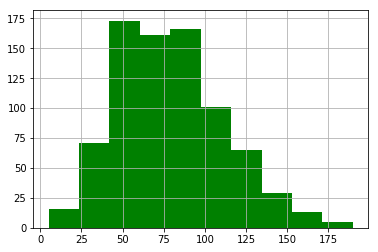

In [71]:
df['Attack'].hist(color  ='green')

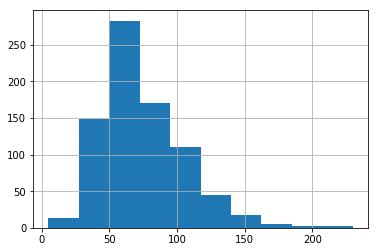

In [72]:
df['Defense'].hist()

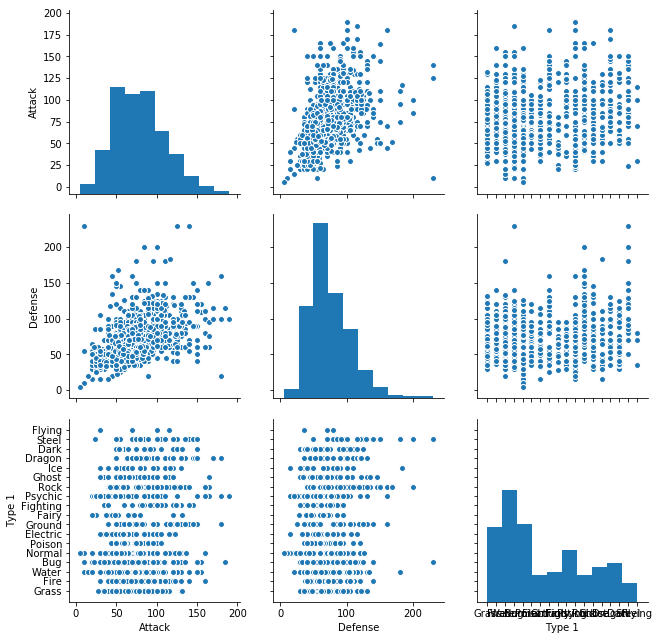

In [75]:
#Seaborns pairplots matrix 
#Takes every combination and plots a simple graph between them 
sns.pairplot(vars=["Attack","Defense","Type 1"], data=df, size=3)

In [97]:
#Taking a subset of all 'normal' types with a high HP
x = HP.loc[HP['Type 1'] == 'Normal']

In [98]:
x.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [99]:
x = x[['Defense', 'Attack', 'Sp. Atk',
       'Sp. Def', 'Speed']]

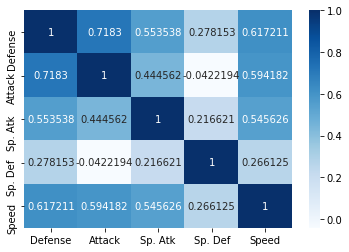

In [102]:
#Checking the correlation values using a heatmap 
sns.heatmap(data = x.corr(), fmt="g", cmap='Blues', annot=True)

In [9]:
#Advanced visualizations

In [10]:
#An explanation of bokeh , used for dashboarding in python 

In [7]:
# Standard imports 
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [8]:
# Plot a complex chart with intearctive hover 

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

In [91]:
#Basic exploration of folium that is used to plot interactive maps in python 

In [4]:
import folium

#Taking some random longitude and latitude 
m = folium.Map(location=[45.5236, -122.6750])

In [5]:
m = folium.Map(
    location=[45.5236, -122.6750],
    tiles='Stamen Toner',
    zoom_start=13
)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)


m